In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import os

In [291]:
def modifylabel(val):
    if val == 0:
        return -1
    else:
        return 1
def remodifylabel(val):
    if val == -1:
        return 0
    else:
        return 1
def activation(w,X):
    a = np.dot(w,X.T)
    for i in range(len(a)):
        if a[i] >= 0:
            a[i] = 1
        else:
            a[i] = -1
    return a
def prediction(w,X):
    y_pr = activation(w,X)
#     for i in range(len(y_pr)):
#         if y_pr[i] == -1:
#             y_pr[i] = 0
#         else: 
#             y_pr[i] = 1
    return y_pr
def myscore(y,y_predicted):
    sahi = 0
    for i in range(len(y)):
        if y[i] == y_predicted[i]:
            sahi += 1
    accuracy = sahi/len(y)
#     print(accuracy)
    return accuracy

In [311]:
df = pd.read_excel("q1train.xlsx")
# ons = np.ones(df.shape[0])
# df['ONES'] = ons
# cols = df.columns
# newcols = [cols[-1],cols[0],cols[1],cols[2]]
# df = df[newcols]
X = df[df.columns[0:-1]].values
print(df.head())
df['Label']=df['Label'].apply(modifylabel)
# print(df['Label'])
# w=np.random.rand(3)
# w = np.random.rand(3)
# w = np.array([-6.3,0.09403203,0.09583417])
y = (df[df.columns[-1]].values).reshape(-1,1)
# w = np.array([4.38272086,-1.55292491])
w = np.array([0,0])
# np.dot(w,X.T)
print(df.head())
y_ = y

    Aptitude     Verbal  Label
0  34.723660  30.386711      0
1  30.386711  35.947409      0
2  35.947409  60.282599      0
3  45.183277  61.206665      0
4  95.961555  75.113658      0
    Aptitude     Verbal  Label
0  34.723660  30.386711     -1
1  30.386711  35.947409     -1
2  35.947409  60.282599     -1
3  45.183277  61.206665     -1
4  95.961555  75.113658     -1


In [313]:
alpha = 0.001
iter=0
# print(w)
accu = []
weights = np.random.rand(2)
y = df['Label']
while iter<10:
    temp = np.zeros(2)
    a = activation(w,X)
    for i in range(len(y)):
        a = activation(w,X)
        if df.Label[i]!=a[i]:
#             print("....")
#         print(a)
#             temp[0] = w[0] + alpha*(df.Label[i])*X[i,0]
            temp[0] = w[0] + alpha*(df.Label[i])*X[i,0]
            temp[1] = w[1] + alpha*(df.Label[i])*X[i,1]
            w = temp
            y_pred = prediction(w,X)
            accu.append(myscore(y,y_pred))
        if myscore(y,y_pred) > 0.6:
            w_ = w
            weights = weights + (w_,)
            y_p_per=prediction(w_,X)
            print(weights)
            print(myscore(y,y_pred))
            print(y_p_per)
            break
    iter+=1
# print(w)
# y_p_per=activation(w,X)
# print(y_p_per)
# df['Label']=df['Label'].apply(remodifylabel)
# print(df['Label'])


In [299]:
weights

(array([ 1.260838  , -0.95767035]),)

In [300]:
print(w_)
print(max(accu))
print(accu.index(max(accu)))

[ 1.260838   -0.95767035]
0.7285714285714285
329


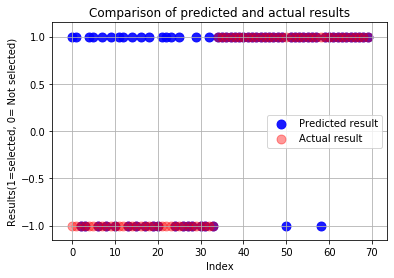

In [302]:
# Plotting results
plt.scatter(range(70),y_p_per,label='Predicted result', alpha=0.9, c='b',s=80)
plt.scatter(range(70),df['Label'],label='Actual result',alpha=0.4,c='r',s=80)
plt.title('Comparison of predicted and actual results',{'fontweight':500,'fontsize':12})
plt.ylabel('Results(1=selected, 0= Not selected)',{'fontweight':500,'fontsize':10})
plt.xlabel("Index",{'fontweight':500,'fontsize':10})
plt.legend()
plt.grid()
plt.savefig('Q2-Predicted results vs actual results of training data.png')

In [303]:
#Checking Accuracy of algorithm by comparing predicted values and actual values of label given
correct = 0
for i in range(len(y_)):
    if y[i] == y_p_per[i]:
        correct += 1
accuracy = correct/len(y_)
print("Percentage accuracy of results is ",accuracy*100,'%')


Percentage accuracy of results is  72.85714285714285 %


In [304]:
myscore(y_,y_p_per)

0.7285714285714285